<a href="https://colab.research.google.com/github/baekdmyng/2025_sesac_ai/blob/main/260106_%EC%8B%A4%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# 시리즈(Series) 생성
s = pd.Series([1, 3, 5, np.nan, 6, 8])

# 결과 확인
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [ ]:
dates = pd.date_range("20260101", periods = 6)

dates

DatetimeIndex(['2026-01-01', '2026-01-02', '2026-01-03', '2026-01-04',
               '2026-01-05', '2026-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))

df

,A,B,C,D
2026-01-01,-0.902241,1.115946,1.013619,0.359163
2026-01-02,0.890256,-0.723052,0.816876,-1.668198
2026-01-03,-0.130796,-2.631240,-0.560253,-2.282542
2026-01-04,0.135530,-0.376801,1.223120,1.934146
2026-01-05,-2.105779,0.684651,1.000603,-0.185958
2026-01-06,1.799274,0.297077,-1.123583,1.920730


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


/tmp/ipython-input-2262394239.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=district_rank.values, y=district_rank.index, palette='coolwarm')


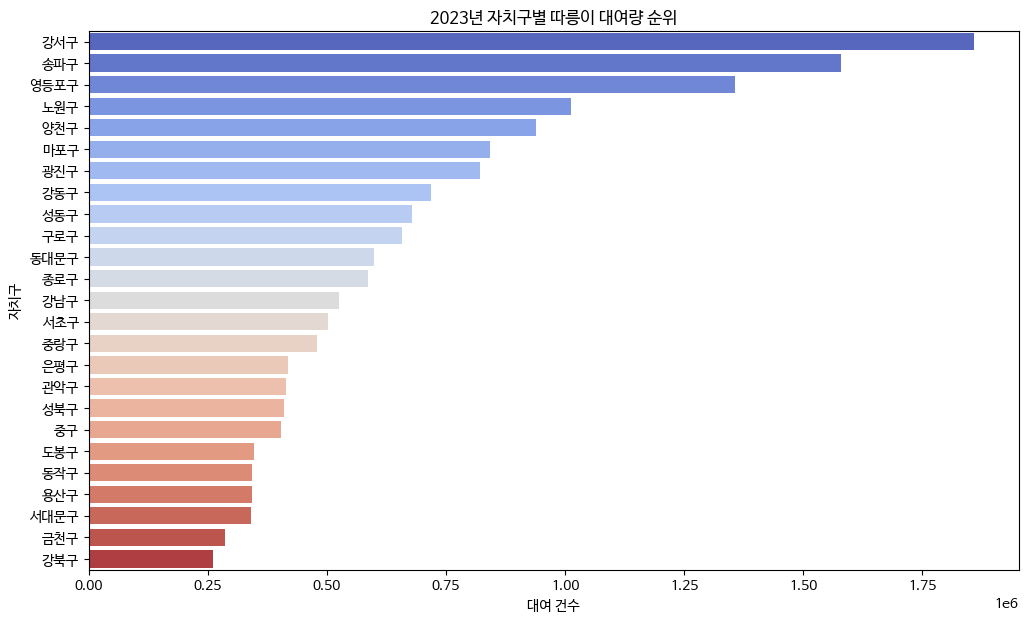

최다 대여 구: 강서구 ( 1859572.0 건)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 2. 파일 경로 설정
path1 = '/content/drive/MyDrive/4주차/화 0106/서울시 공공자전거 자치구별 대여건수(2021년).xlsx'
path2 = '/content/drive/MyDrive/4주차/화 0106/대여소별 반납내역(2017년).xlsx'

# 3. 데이터 로드 (엑셀 파일이므로 read_excel 사용)
# 파일 내에 시트가 여러 개라면 sheet_name='시트명'을 추가하세요.
df_rent = pd.read_excel(path1)
df_return = pd.read_excel(path2)

# 4. 한글 폰트 설정 (그래프 깨짐 방지)
!apt-get install -y fonts-nanum
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 5. [분석] 2023년 자치구별 대여 건수 확인
# 데이터 구조에 따라 '년', '월', '소계' 컬럼이 있는지 확인 후 필터링
df_2023 = df_rent[(df_rent['년'] == 2023) & (df_rent['월'] == '소계')]

# 자치구 컬럼만 추출 (계, 년, 월 등 제외)
exclude_cols = ['년', '월', '계', '기타']
districts = [c for c in df_rent.columns if c not in exclude_cols]
district_rank = df_2023[districts].iloc[0].sort_values(ascending=False)

# 6. 시각화
plt.figure(figsize=(12, 7))
sns.barplot(x=district_rank.values, y=district_rank.index, palette='coolwarm')
plt.title('2023년 자치구별 따릉이 대여량 순위')
plt.xlabel('대여 건수')
plt.ylabel('자치구')
plt.show()

print("최다 대여 구:", district_rank.index[0], "(", district_rank.values[0], "건)")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


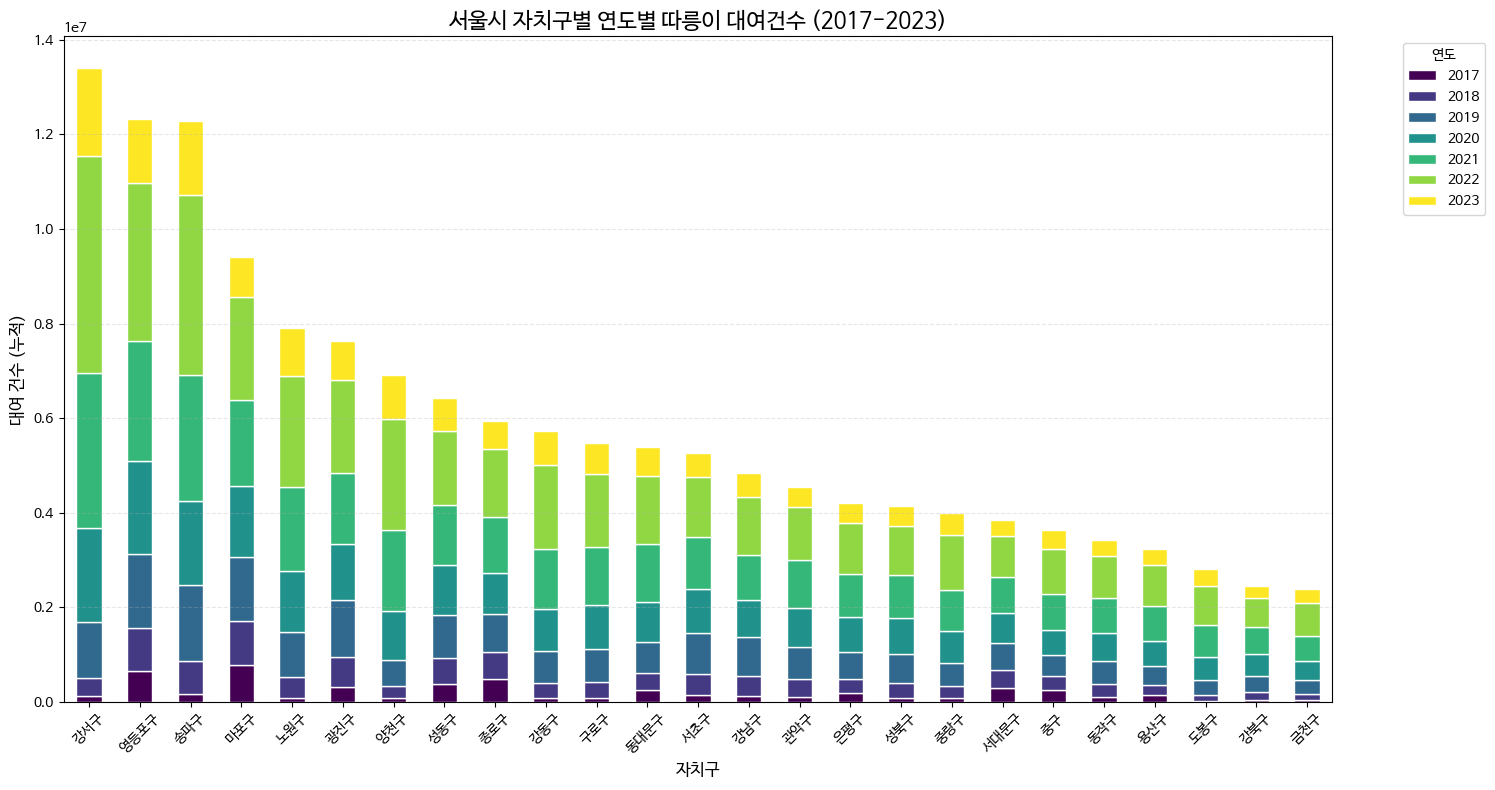

종합 대여량 1위 자치구: 강서구


In [ ]:
# 1. 드라이브 마운트 및 데이터 로드
path1 = '/content/drive/MyDrive/4주차/화 0106/서울시 공공자전거 자치구별 대여건수(2021년).xlsx'
df_rent = pd.read_excel(path1)

# 2. 한글 폰트 설정
!apt-get install -y fonts-nanum
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 3. 데이터 전처리
# 각 연도별 '소계' 데이터만 필터링
df_annual = df_rent[df_rent['월'] == '소계'].copy()

# 분석에 필요한 컬럼 설정 (년도와 자치구들)
exclude_cols = ['월', '계', '기타']
districts = [c for c in df_annual.columns if c not in exclude_cols and c != '년']

# 연도를 인덱스로 설정하고 자치구 데이터만 남기기
df_pivot = df_annual.set_index('년')[districts]

# 그래프를 그리기 위해 행과 열을 바꿈 (T: Transpose)
# 행: 자치구, 열: 연도
df_plot = df_pivot.T

# 전체 대여량 합계 순으로 정렬 (그래프를 보기 좋게 만들기 위함)
df_plot['total'] = df_plot.sum(axis=1)
df_plot = df_plot.sort_values('total', ascending=False).drop(columns='total')

# 4. 시각화 (누적 막대 그래프)
ax = df_plot.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis', edgecolor='white')

plt.title('서울시 자치구별 연도별 따릉이 대여건수 (2017-2023)', fontsize=16)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('대여 건수 (누적)', fontsize=12)
plt.legend(title='연도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# 인사이트 출력
top_district = df_plot.index[0]
print(f"종합 대여량 1위 자치구: {top_district}")

📅 연도별 따릉이 최다 대여 자치구
2017년: 마포구 (782,544건)
2018년: 마포구 (921,837건)
2019년: 송파구 (1,602,365건)
2020년: 강서구 (1,992,035건)
2021년: 강서구 (3,274,017건)
2022년: 강서구 (4,600,475건)
2023년: 강서구 (1,859,572건)


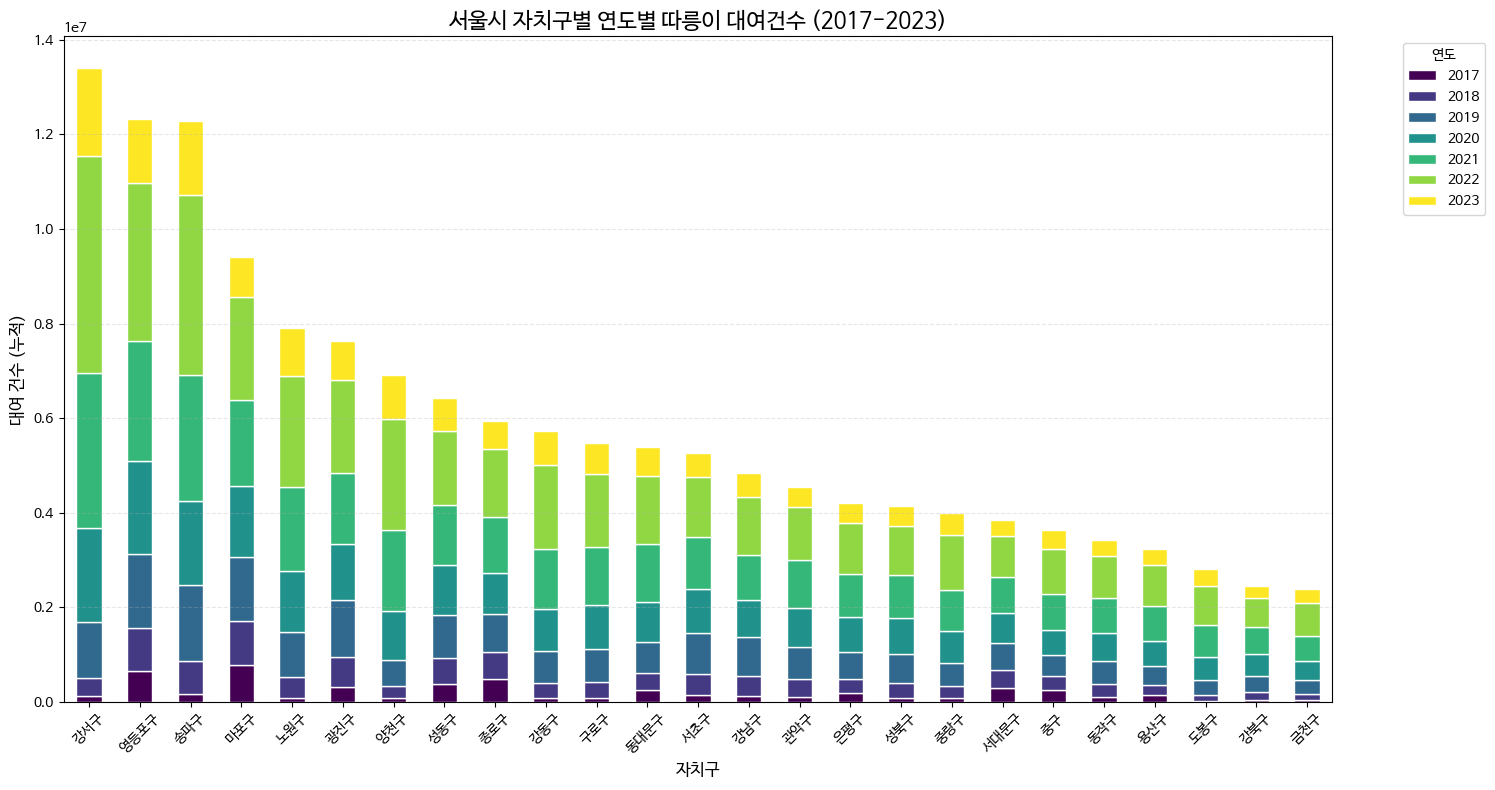


🏆 전체 기간 종합 대여량 1위: 강서구


In [ ]:
# 1. 드라이브 마운트 및 데이터 로드
path1 = '/content/drive/MyDrive/4주차/화 0106/서울시 공공자전거 자치구별 대여건수(2021년).xlsx'
df_rent = pd.read_excel(path1)


# 3. 데이터 전처리
df_annual = df_rent[df_rent['월'] == '소계'].copy()
exclude_cols = ['월', '계', '기타']
districts = [c for c in df_annual.columns if c not in exclude_cols and c != '년']

# 연도별 1위 자치구 찾기 (반복문 활용)
print("="*40)
print("📅 연도별 따릉이 최다 대여 자치구")
print("="*40)

yearly_tops = {}
for year in sorted(df_annual['년'].unique()):
    # 해당 연도 데이터만 추출
    year_data = df_annual[df_annual['년'] == year][districts].T
    year_data.columns = ['count']

    # 해당 연도 대여량 1위 구와 수치 찾기
    top_dist = year_data['count'].idxmax()
    top_val = year_data['count'].max()

    yearly_tops[year] = top_dist
    print(f"{year}년: {top_dist} ({int(top_val):,}건)")

# 4. 시각화용 데이터 준비 (누적 막대)
df_pivot = df_annual.set_index('년')[districts]
df_plot = df_pivot.T
df_plot['total'] = df_plot.sum(axis=1)
df_plot = df_plot.sort_values('total', ascending=False).drop(columns='total')

# 5. 시각화 실행
ax = df_plot.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis', edgecolor='white')
plt.title('서울시 자치구별 연도별 따릉이 대여건수 (2017-2023)', fontsize=16)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('대여 건수 (누적)', fontsize=12)
plt.legend(title='연도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 최종 결과 출력
print("\n" + "="*40)
print(f"🏆 전체 기간 종합 대여량 1위: {df_plot.index[0]}")
print("="*40)